In [15]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [4]:
data = load_breast_cancer()

In [13]:
X = data.data[:,[0,1]]
y = data.target

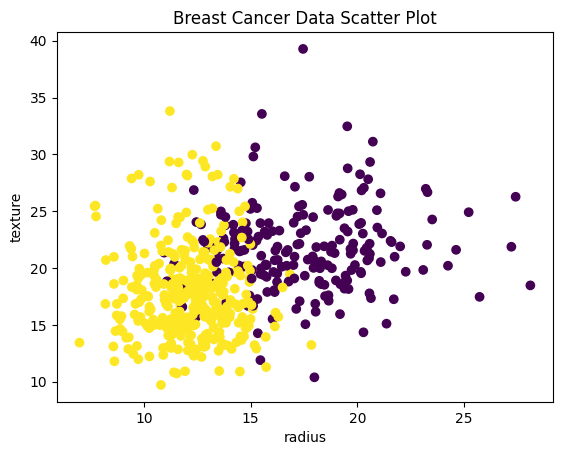

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

plt.xlabel('radius')
plt.ylabel('texture')
plt.title('Breast Cancer Data Scatter Plot')

plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [49]:
from torch import nn

In [53]:
class LinearReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self, x):
        return self.weight * x + self.bias

In [58]:
torch.manual_seed(42)
model = LinearReg()
model.state_dict()
print(model.state_dict())

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])
